<a href="https://colab.research.google.com/github/georgesteve/Code2/blob/master/4TAIAComparativa_entre_KNN_Desicion_Trees_y_Esemble_Learning_222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparativa entre KNN, Desicion Trees y Esemble Learning

## Introdución

Para la presentacion de la practica 3 y 4 del curso de Inteligencia Artificial a cargo del Ing. Paul Cardenas, para lo cual realizamos lo siguiente:
Usando una base de datos de vinos, entre estos datos estan contenidos propiedades quimicas del vino, ademas de caracteristicas de calidad (3-9 mas es mejor) y por último el color del vino (rojo y blanco). El nombre del archivo es 'Wine_Quality_Data.csv'.

## Carga de la Data


In [0]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
data_path = ['data']
filepath = os.sep.join(data_path + ['Wine_Quality_Data.csv'])
data = pd.read_csv(filepath, sep=',')

In [9]:

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Cargar el Drive helper y mount
from google.colab import drive

# Link y Codigo de autorizacion.
drive.mount('/content/drive_all')

# Cargar datos del google drive
data = pd.read_csv('/content/drive_all/My Drive/dataset/Wine_Quality_Data.csv')

Drive already mounted at /content/drive_all; to attempt to forcibly remount, call drive.mount("/content/drive_all", force_remount=True).


## Revisión de las Caractericas (Features) de la Data

* Examinamos la data.

In [10]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


* Vemos el tipo de variable que acompaña a cada caracteristica.

In [11]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

* Cambiamos el formato de los datos en la columna de 'color' para asi poder usarlos.

In [0]:
data['color'] = data.color.replace('white',0).replace('red',1).astype(np.int)

# Desicion Trees

## Separación de la Data

* Usando `StratifiedShuffleSplit` para separar la data en una entrenamiento y en una de prueba.

In [0]:
feature_cols = [x for x in data.columns if x not in 'color']

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

Data_split = StratifiedShuffleSplit(n_splits=1, test_size=1000, random_state=42)

train_idx, test_idx = next(Data_split.split(data[feature_cols], data['color']))

X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'color']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'color']

* Verificando que se separo bien la data.

In [17]:
X_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
3627,8.9,0.21,0.34,7.1,0.037,33.0,150.0,0.99620,3.10,0.45,9.7,6
1932,6.5,0.28,0.34,9.9,0.038,30.0,133.0,0.99540,3.11,0.44,9.8,5
5055,6.0,0.39,0.13,1.2,0.042,60.0,172.0,0.99114,3.06,0.52,10.6,5
2372,6.1,0.27,0.30,16.7,0.039,49.0,172.0,0.99985,3.40,0.45,9.4,5
158,7.1,0.68,0.00,2.2,0.073,12.0,22.0,0.99690,3.48,0.50,9.3,5


## Generando el modelo de Desicion Trees

* Ajustando el modelo con la parte de entrenamiento que separamos anteriormente, no usaremos profundidad máxima, cantidad de nodos ni cantidad de caracteristicas.

In [0]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

* Número de nodos y máxima produndidad.

In [23]:
dt.tree_.node_count, dt.tree_.max_depth

(171, 22)

* Función para medir el error.

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def errorfunc(y, y_pred, label):
    return pd.Series({'exactitud':accuracy_score(y, y_pred),
                      'precisión': precision_score(y, y_pred),
                      'recall': recall_score(y, y_pred),
                      'f1': f1_score(y, y_pred)},
                      name=label)

* Calculando el Error.

In [25]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

full_error = pd.concat([errorfunc(y_train, y_train_pred, 'train'),
                              errorfunc(y_test, y_test_pred, 'test')],
                              axis=1)

full_error

,train,test
exactitud,0.999818,0.984000
f1,0.999631,0.967611
precisión,0.999261,0.963710
recall,1.000000,0.971545


## Grid para la optimización de parametros

* Ajustando el modelo con grid para mejorar la presicion y eliminando el overfiting.

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='precision',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

* Número de nodos y máxima produndidad.

In [0]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(129, 9)

* Calculando el Error.

In [0]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([errorfunc(y_train, y_train_pred_gr, 'train'),
                                 errorfunc(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [0]:
train_test_gr_error

,train,test
exactitud,0.997089,0.990000
f1,0.994061,0.979592
precisión,0.998509,0.983607
recall,0.989653,0.975610


## Desicion Tree para prediccion de valores continuos

* Re-separamos la data `X` e `y`, está vez trataremos de predecir la cantidad de alcohol del vino.

In [0]:
feature_cols = [x for x in data.columns if x != 'alcohol']

X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'alcohol']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'alcohol']

* Usando Grid para predecir el modelo.

In [0]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor().fit(X_train, y_train)

param_grid = {'max_depth':range(1, dr.tree_.max_depth+1, 2),
              'max_features': range(1, len(dr.feature_importances_)+1)}

GR_alcohol = GridSearchCV(DecisionTreeRegressor(random_state=42),
                     param_grid=param_grid,
                     scoring='neg_mean_squared_error',
                      n_jobs=-1)

GR_alcohol = GR_alcohol.fit(X_train, y_train)

* Número de nodos y máxima produndidad.

In [0]:
GR_alcohol.best_estimator_.tree_.node_count, GR_alcohol.best_estimator_.tree_.max_depth

(1787, 11)

The error on train and test data sets. Since this is continuous, we will use mean squared error.

In [0]:
from sklearn.metrics import mean_squared_error

y_train_pred_alcohol = GR_alcohol.predict(X_train)
y_test_pred_alcohol  = GR_alcohol.predict(X_test)

alcohol_error = pd.Series({'train': mean_squared_error(y_train, y_train_pred_alcohol),
                                         'test':  mean_squared_error(y_test, y_test_pred_alcohol)},
                                          name='MSE').to_frame().T

alcohol_error

,test,train
MSE,0.299873,0.086691


Comparemos los valores reales con los obtenidos.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

% matplotlib inline

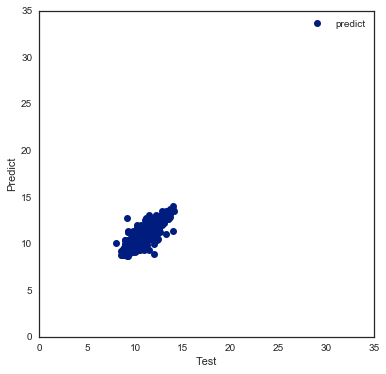

In [0]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

alcohol_test_predict = pd.DataFrame({'test':y_test.values,
                                'predict': y_test_pred_alcohol}).set_index('test').sort_index()

alcohol_test_predict.plot(marker='o', ls='', ax=ax)
ax.set(xlabel='Test', ylabel='Predict', xlim=(0,35), ylim=(0,35));

# KNN


## KNN como Clasificador

* Debido a que usaremos un clasificador necesitamos re-definir la data.

In [0]:
feature_cols = [x for x in data.columns if x not in 'color']
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'color']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'color']

* Usando una cantidad de vecinos aleatoria para ver el rendimiento del modelo.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
y_pred_test=knn.predict(X_test)

* Calculamos el Error

In [26]:
train_test_knn_error= pd.Series({'train': accuracy_score(y_train, y_pred),
                                         'test':  accuracy_score(y_test, y_pred_test)},
                                          name='Exactitud').to_frame().T
train_test_knn_error

,test,train
Exactitud,0.944,0.947972


* Observemos el comportamiento de la cantidad de vecinos con respecto de la precisión.

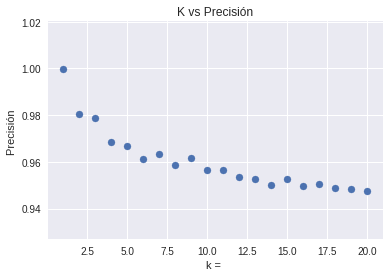

In [27]:
ac=np.array([]) 
for k in range(20):
    k1=k+1
    knnp = KNeighborsClassifier(n_neighbors=k1,p=1)
    knnp = knnp.fit(X_train, y_train)
    y_predp = knnp.predict(X_train)
    acc=accuracy_score(y_train,y_predp)
    ac=np.insert(ac,k,acc)
%matplotlib inline
k=np.array(range(20))
k=k+1
ac=pd.DataFrame(ac,columns=['Accuracy'])
k=pd.DataFrame(k,columns=['K'])

ax = plt.axes()

ax.scatter(k.K,ac.Accuracy)

# Label the axes
ax.set(xlabel='k = ',
       ylabel='Precisión ',
       title='K vs Precisión');

* Observamos que el mejor perfomance se logra con K=1, pero esto podria ser una casualidad encontrar el mejor k usaremos "cross_val_score".

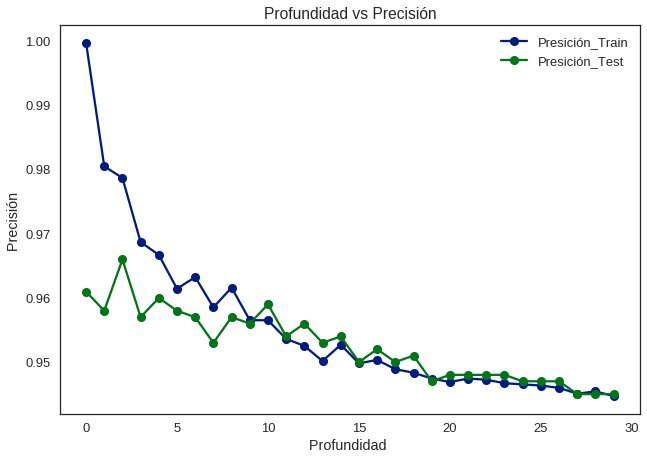

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
ac_train=np.array([])
n_c=np.array([])
m_d=np.array([])
ac_test=np.array([])
for k in range(30):
    k1=k+1
    dt =  KNeighborsClassifier(k1,p=1)
    dt = dt.fit(X_train, y_train)
    
    
 
    
    y_pred=dt.predict(X_train)
    y_pred_test=dt.predict(X_test)
    
    ac_tr=accuracy_score(y_train, y_pred)
    ac_ts=accuracy_score(y_test,y_pred_test)
    ac_train=np.insert(ac_train,k,ac_tr)
    ac_test=np.insert(ac_test,k,ac_ts)
%matplotlib inline


def gengraf(vc, i, label):
    k=np.array(range(i))
    k=k+1
    vc=pd.DataFrame(vc,columns=[label])
    k=pd.DataFrame(k,columns=['K'])
    return vc
  
ac_train=gengraf(ac_train,30,'Presición_Train')
ac_test=gengraf(ac_test,30,'Presición_Test')
n_c=gengraf(n_c,30,'Número de Nodos')
m_d=gengraf(m_d,30,'Profundida Máxima')

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')
ac_total= pd.concat([ac_train,ac_test], axis=1)
ax = ac_total.plot(marker='o')
ax.set(xlabel='Profundidad ',
       ylabel='Precisión ',
       title='Profundidad vs Precisión');

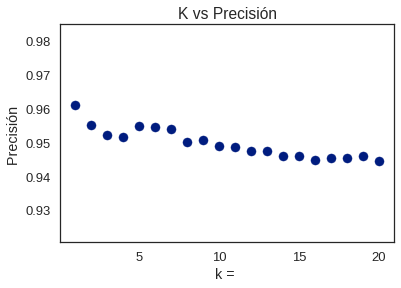

In [35]:
from sklearn.model_selection import cross_val_score
ac=np.array([]) 
for k in range(20):
    k1=k+1
    knnp = KNeighborsClassifier(n_neighbors=k1,p=1)
    cross_val= cross_val_score(knnp, X_train, y_train, cv=20)
    cross_val_mean=np.mean(cross_val)
    ac=np.insert(ac,k,cross_val_mean)
%matplotlib inline
k=np.array(range(20))
k=k+1
ac=pd.DataFrame(ac,columns=['Accuracy'])
k=pd.DataFrame(k,columns=['K'])

ax = plt.axes()

ax.scatter(k.K,ac.Accuracy)

# Label the axes
ax.set(xlabel='k = ',
       ylabel='Precisión ',
       title='K vs Precisión');

## KNN como Regresión

* Debido a que usaremos una Regresión necesitamos re-definir la data.

In [0]:
feature_cols = [x for x in data.columns if x not in 'alcohol']
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'alcohol']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'alcohol']

* Usando una cantidad de vecinos aleatoria para ver el rendimiento del modelo.

In [0]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=10)
knr = knr.fit(X_train, y_train)
y_pred = knr.predict(X_train)
y_pred_test=knr.predict(X_test)

* Calculamos el Error

In [0]:

train_test_knr_error = pd.Series({'train': mean_squared_error(y_train, y_pred),
                                         'test':  mean_squared_error(y_test, y_pred_test)},
                                          name='MSE').to_frame().T
train_test_knr_error

,test,train
MSE,1.002532,0.805568


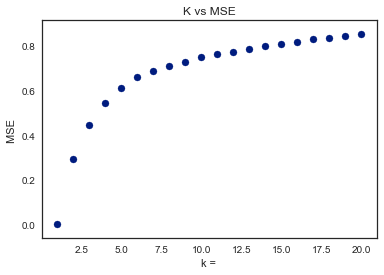

In [0]:
ac=np.array([]) 
for k in range(20):
    k1=k+1
    knnp = KNeighborsRegressor(n_neighbors=k1,p=1)
    knnp = knnp.fit(X_train, y_train)
    y_predp = knnp.predict(X_train)
    acc=mean_squared_error(y_train,y_predp)
    ac=np.insert(ac,k,acc)
%matplotlib inline
k=np.array(range(20))
k=k+1
ac=pd.DataFrame(ac,columns=['Accuracy'])
k=pd.DataFrame(k,columns=['K'])

ax = plt.axes()

ax.scatter(k.K,ac.Accuracy)

# Label the axes
ax.set(xlabel='k = ',
       ylabel='MSE ',
       title='K vs MSE');

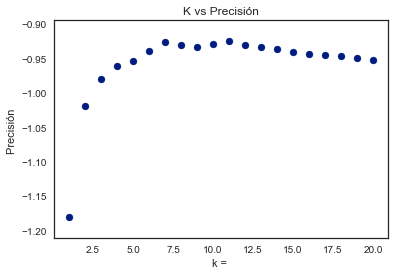

In [0]:
ac=np.array([]) 
for k in range(20):
    k1=k+1
    knnp = KNeighborsRegressor(n_neighbors=k1,p=1)
    cross_val= cross_val_score(knnp, X_train, y_train, cv=20,scoring='neg_mean_squared_error')
    cross_val_mean=np.mean(cross_val)
    ac=np.insert(ac,k,cross_val_mean)
%matplotlib inline
k=np.array(range(20))
k=k+1
ac=pd.DataFrame(ac,columns=['Accuracy'])
k=pd.DataFrame(k,columns=['K'])

ax = plt.axes()

ax.scatter(k.K,ac.Accuracy)

# Label the axes
ax.set(xlabel='k = ',
       ylabel='Precisión ',
       title='K vs Precisión');

# SVM
* 
* Create a `pairplot` for the dataset.

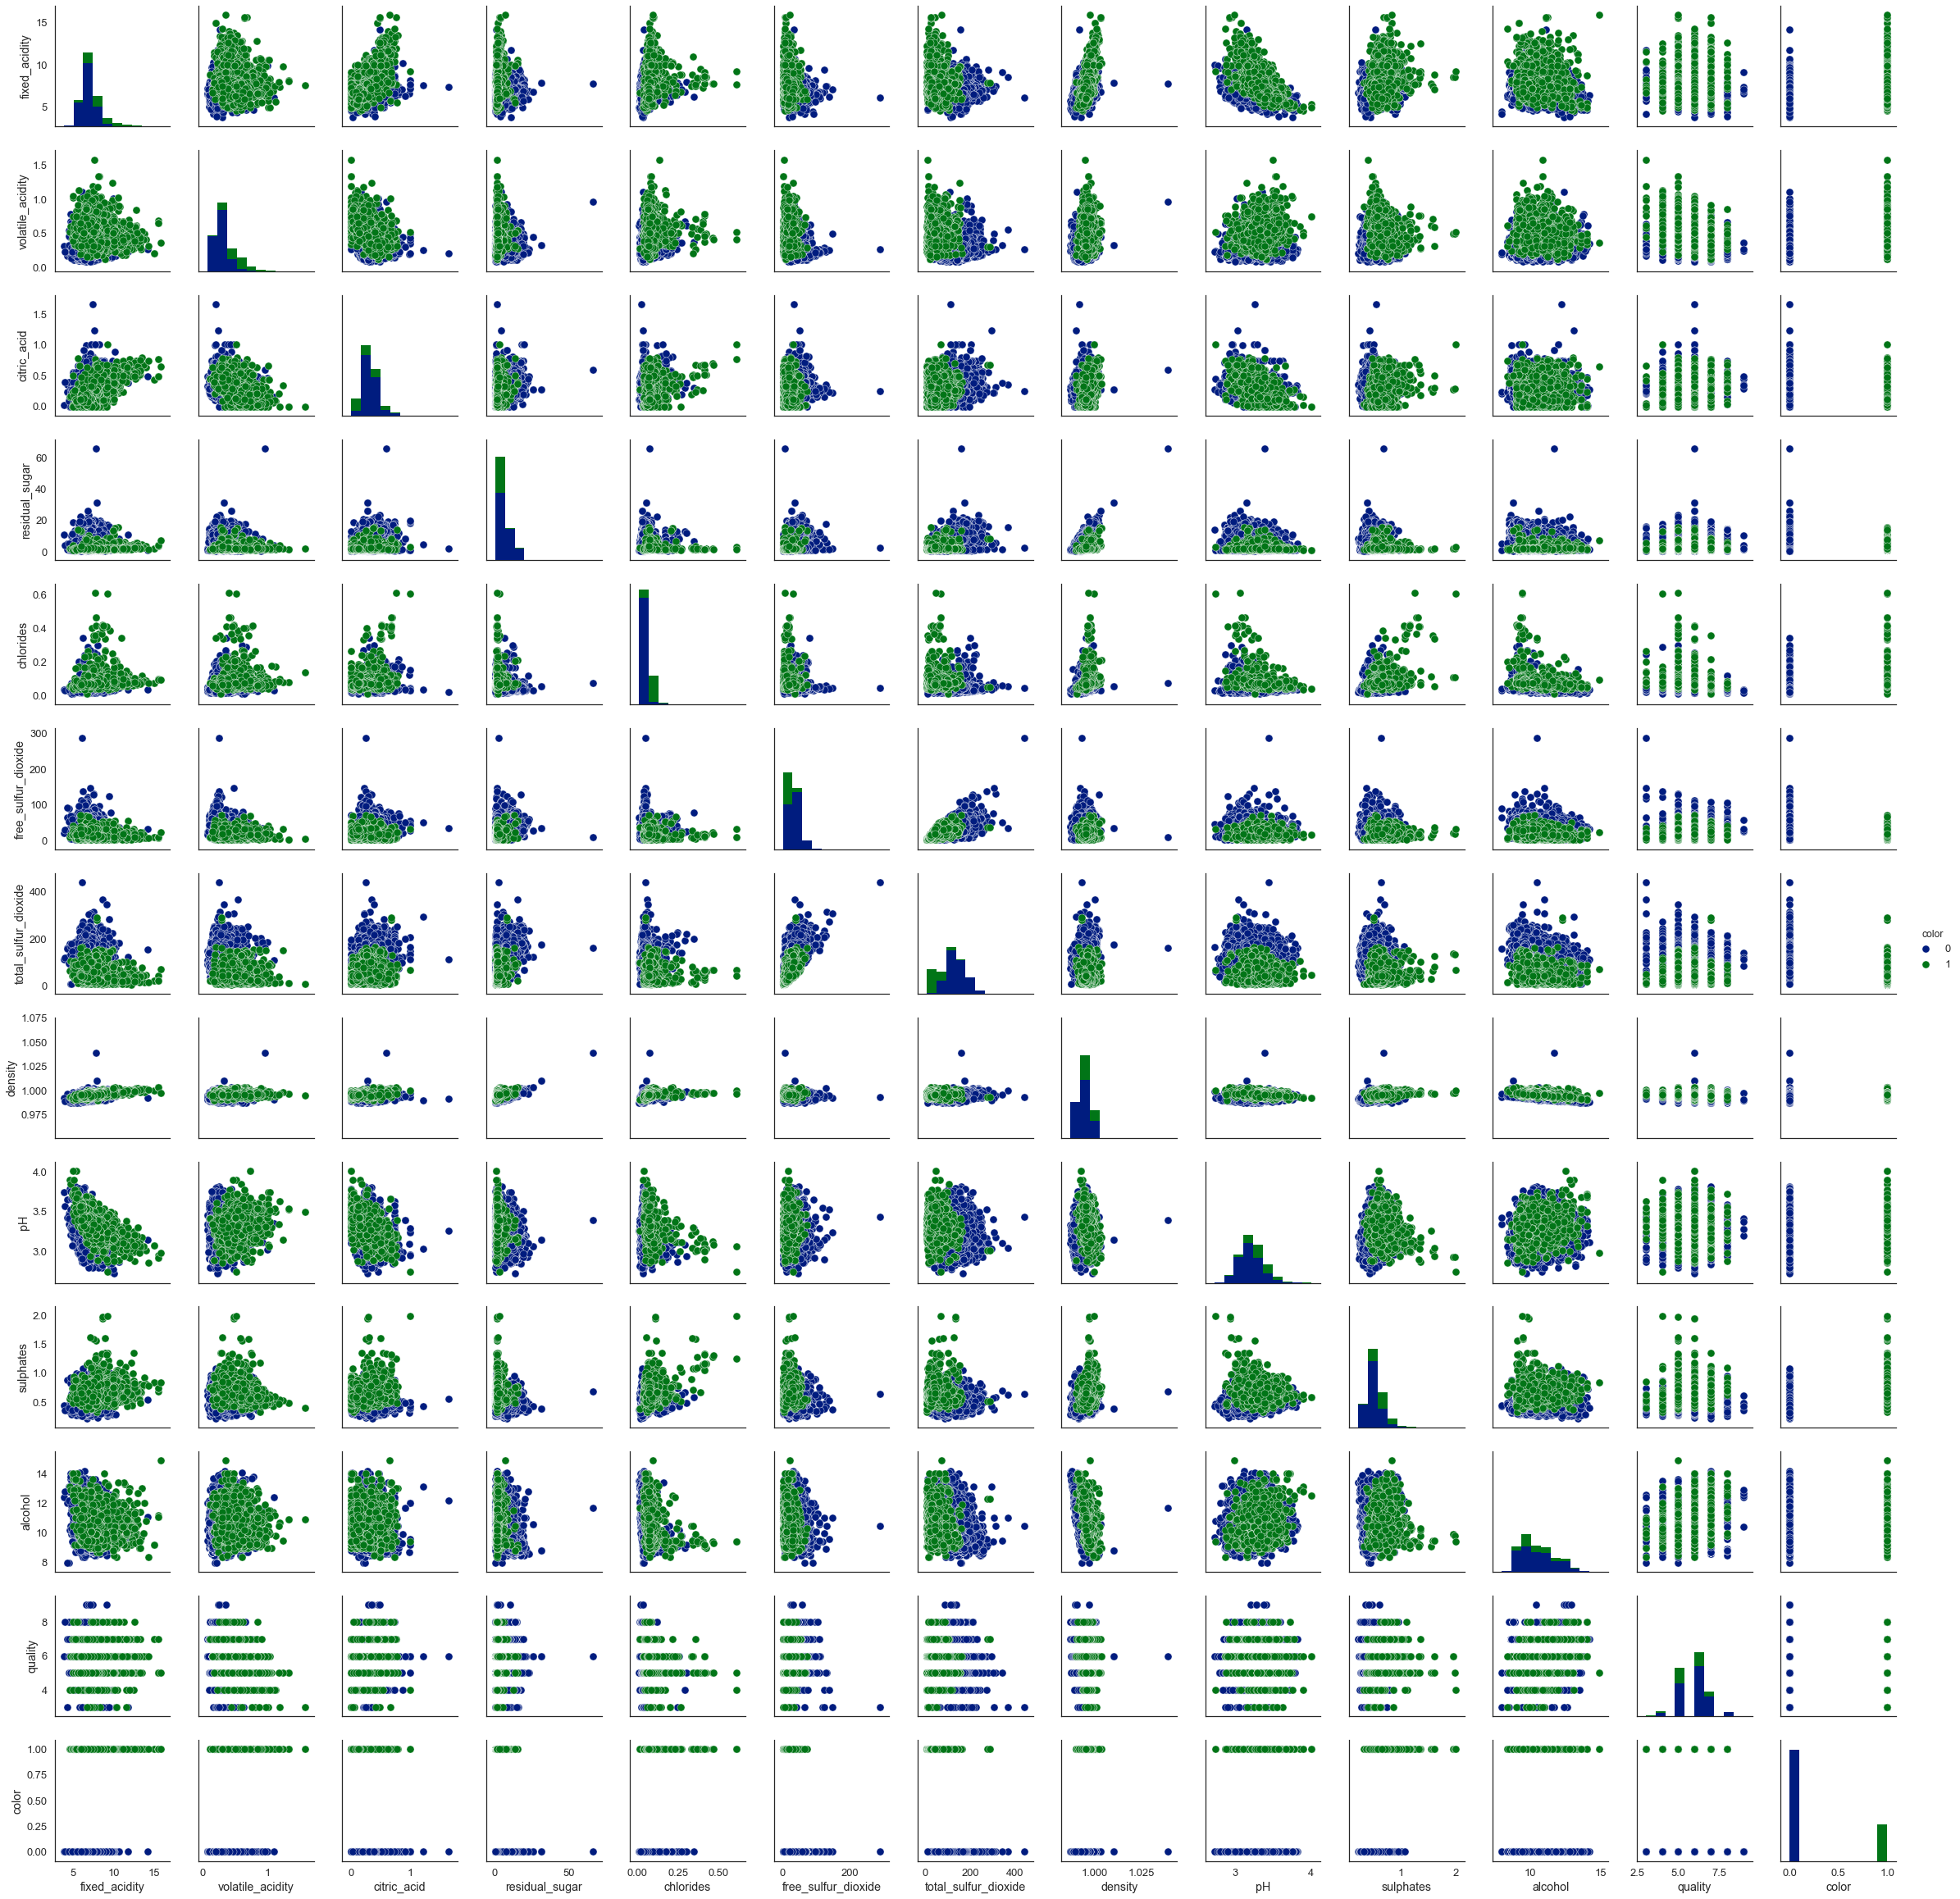

In [0]:
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')
sns.pairplot(data, hue='color')

* Create a bar plot showing the correlations between each column and `y`

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


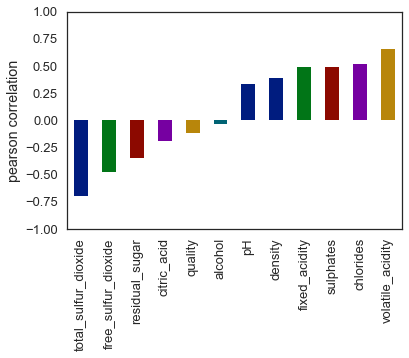

In [0]:
feature_cols = [x for x in data.columns if x not in 'color']
X = data.loc[:, feature_cols]
y = data.loc[:, 'color']
correlations = X.corrwith(y)
correlations.sort_values(inplace=True)
correlations
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');
X.head()

* Pick the most 2 correlated fields (using the absolute value of correlations) and create `X`
* Use MinMaxScaler to scale `X`. Note that this will output a np.array. Make it a DataFrame again and rename the columns appropriately.

In [0]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X = data[fields]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X= pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
X.head()

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')


,volatile_acidity_scaled,total_sulfur_dioxide_scaled
0,0.413333,0.064516
1,0.533333,0.140553
2,0.453333,0.110599
3,0.133333,0.124424
4,0.413333,0.064516


* Fit a Linear Support Vector Machine Classifier to `X`, `y`


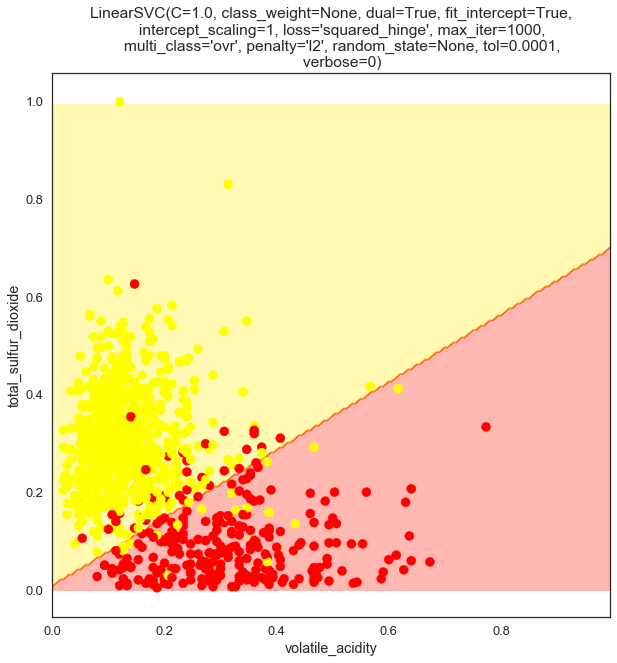

In [0]:
from sklearn.svm import LinearSVC
LSVC = LinearSVC()
LSVC.fit(X, y)

def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(1000, random_state=42)
    y_color = y.loc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title=str(estimator))
    
plot_decision_boundary(LSVC, X, y)

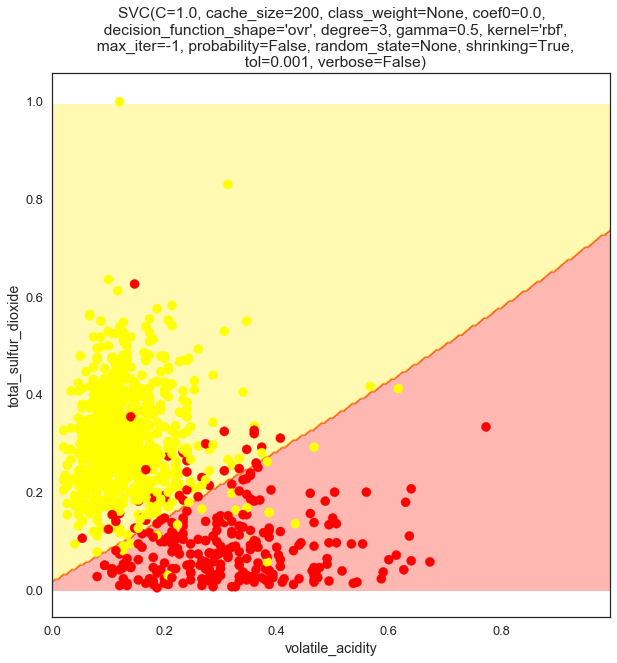

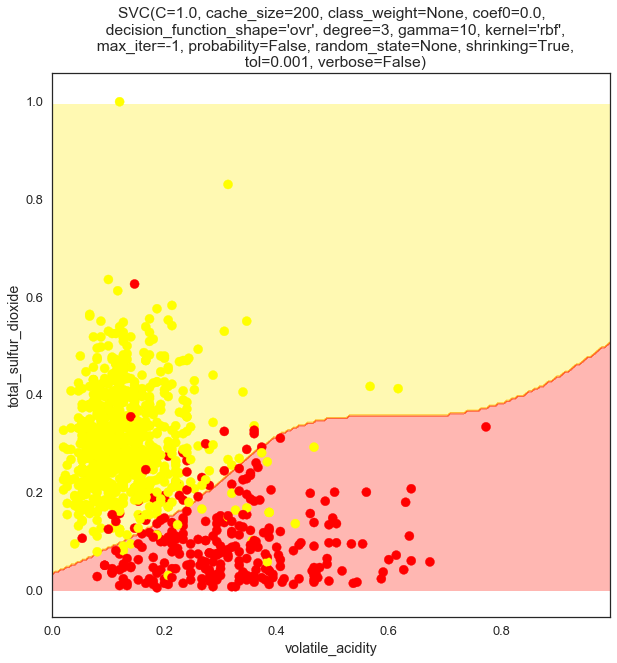

In [0]:
from sklearn.svm import SVC

gammas = [.5, 10]
for gamma in gammas:
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(SVC_Gaussian, X, y)

In [0]:
Cs = [.1, 10]
for C in Cs:
    SVC_Gaussian = SVC(kernel='rbf', gamma=2, C=C)
    plot_decision_boundary(SVC_Gaussian, X, y)

NameError: name 'SVC' is not defined